In [221]:
# 1.2 The IMDb Top 250 Movies list:
# https://www.imdb.com/chart/top/
# https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=num_votes,asc


In [222]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [223]:
url = 'https://www.imdb.com/chart/top/'


In [224]:
page = requests.get(url)


In [225]:
soup = BeautifulSoup(page.content, 'html.parser')


In [226]:
soup.title.text.strip()


'Top 250 Movies - IMDb'

In [227]:
# 1. Scrape the movie titles, release years, ratings, and other
# data from the table and store it in a Pandas DataFrame for
# further analysis.


In [228]:
title = soup.find_all('td', {'class': 'titleColumn'})


In [229]:
title_list = []
for value in title:
    title_list.append(value.text.strip().split('.'))


In [230]:
title_list2 = []
for item in title_list:
    title_list2.append(item[1].strip())


In [231]:
title_list3 = []
for item in title_list2:
    title_list3.append(item.replace('\n', '').replace(')', '').split('('))


In [232]:
df_title = pd.DataFrame(title_list3)


In [233]:
df_title


,0,1
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957
...,...,...
245,Dersu Uzala,1975
246,The Help,2011
247,Aladdin,1992
248,Gandhi,1982


In [234]:
df_title.rename(columns={0: 'Title'}, inplace=True)


In [235]:
df_title


,Title,1
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957
...,...,...
245,Dersu Uzala,1975
246,The Help,2011
247,Aladdin,1992
248,Gandhi,1982


In [236]:
df_title.rename(columns={1: 'Year_Released'}, inplace=True)


In [237]:
df_title


,Title,Year_Released
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957
...,...,...
245,Dersu Uzala,1975
246,The Help,2011
247,Aladdin,1992
248,Gandhi,1982


In [238]:
df_title.set_index('Title', inplace=True)


In [239]:
df_title


,Year_Released
Title,
The Shawshank Redemption,1994
The Godfather,1972
The Dark Knight,2008
The Godfather Part II,1974
12 Angry Men,1957
...,...
Dersu Uzala,1975
The Help,2011
Aladdin,1992


In [240]:
rating = soup.find_all('td', {'class': 'ratingColumn'})

In [241]:
rating_list = []
for value in rating:
    rating_list.append(value.text.strip())


In [242]:
rating_list2 = []
for i in range(len(rating_list)):
    if i % 2 == 0:
        rating_list2.append(rating_list[i])


In [243]:
df_title['Ratings'] = rating_list2


In [244]:
df_title


,Year_Released,Ratings
Title,,
The Shawshank Redemption,1994,9.2
The Godfather,1972,9.2
The Dark Knight,2008,9.0
The Godfather Part II,1974,9.0
12 Angry Men,1957,9.0
...,...,...
Dersu Uzala,1975,8.0
The Help,2011,8.0
Aladdin,1992,8.0


In [245]:
# 2. Extract the genres of each movie and create a visualization
# of the most common genres using Pandas and Matplotlib.


In [246]:
url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=num_votes,asc'


In [247]:
page = requests.get(url)


In [248]:
soup = BeautifulSoup(page.content, 'html.parser')


In [249]:
top_titles = soup.find_all('h3', {'class': 'lister-item-header'})


In [250]:
top_titles_list = []
for value in top_titles:
    top_titles_list.append(value.text.replace('\n', '').strip())


In [251]:
top_titles_list2 = []
for value in top_titles_list:
    top_titles_list2.append(value[2:])


In [252]:
df_top_titles = pd.DataFrame(top_titles_list2)


In [253]:
df_top_titles


,0
0,Nowhere to Run(1993)
1,Stormbreaker(2006)
2,Muppet Treasure Island(1996)
3,Agneepath(2012)
4,Evangelion Shin Gekijôban: Jo(2007)
5,Koi... Mil Gaya(2003)
6,2.0(2018)
7,Crocodile Dundee in Los Angeles(2001)
8,The Contract(2006)
9,.Men at Work(1990)


In [254]:
df_top_titles.rename(columns={0 : 'Top_Titles'}, inplace=True)


In [255]:
df_top_titles


,Top_Titles
0,Nowhere to Run(1993)
1,Stormbreaker(2006)
2,Muppet Treasure Island(1996)
3,Agneepath(2012)
4,Evangelion Shin Gekijôban: Jo(2007)
5,Koi... Mil Gaya(2003)
6,2.0(2018)
7,Crocodile Dundee in Los Angeles(2001)
8,The Contract(2006)
9,.Men at Work(1990)


In [256]:
genre = soup.find_all('span', {'class': 'genre'})


In [257]:
genre_list = []
for value in genre:
    genre_list.append(value.text.strip())


In [258]:
df_top_titles['Genres'] = genre_list


In [259]:
df_top_titles


,Top_Titles,Genres
0,Nowhere to Run(1993),"Action, Drama, Romance"
1,Stormbreaker(2006),"Action, Adventure, Family"
2,Muppet Treasure Island(1996),"Action, Adventure, Comedy"
3,Agneepath(2012),"Action, Crime, Drama"
4,Evangelion Shin Gekijôban: Jo(2007),"Animation, Action, Drama"
5,Koi... Mil Gaya(2003),"Action, Drama, Romance"
6,2.0(2018),"Action, Sci-Fi, Thriller"
7,Crocodile Dundee in Los Angeles(2001),"Action, Adventure, Comedy"
8,The Contract(2006),"Action, Crime, Drama"
9,.Men at Work(1990),"Action, Comedy, Crime"


In [260]:
genre_separate = []
for genre_group in df_top_titles.Genres:
    genre_separate.append(genre_group.split(','))



In [261]:
genre_set = set()
for item in genre_separate:
    for i in range(len(item)):
        genre_set.add(item[i].strip())


In [290]:
genre_count = []

for genre in genre_set:
    count = 0
    for item in genre_separate:
        for i in range(len(item)):
            v = item[i].strip()
            if v == genre:
                count += 1
    genre_count.append(count)


In [263]:
len(genre_count)


16

In [264]:
len(genre_set)


16

In [265]:
df_genre_count = pd.DataFrame(genre_set)


In [266]:
df_genre_count['Count'] = genre_count


In [267]:
df_genre_count


,0,Count
0,Mystery,2
1,Western,1
2,Adventure,14
3,History,1
4,Crime,12
5,Animation,1
6,Horror,2
7,Action,50
8,Drama,23
9,Family,1


In [268]:
df_genre_count.rename(columns={0 : 'Genres'}, inplace=True)


In [269]:
df_genre_count


,Genres,Count
0,Mystery,2
1,Western,1
2,Adventure,14
3,History,1
4,Crime,12
5,Animation,1
6,Horror,2
7,Action,50
8,Drama,23
9,Family,1


In [270]:
df_genre_count.set_index('Genres', inplace=True)


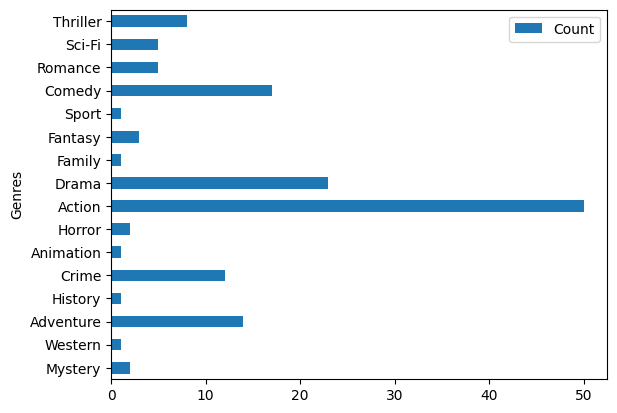

In [271]:
df_genre_count.plot(kind='barh')
plt.show()


In [272]:
# 3. Create a scatterplot of the movie ratings versus the number of
# votes using Pandas and Matplotlib to visualize the relationship
# between ratings and popularity.



In [273]:
ratings = soup.find_all('div', {'class': 'ratings-imdb-rating'})


In [274]:
ratings_list = []
for value in ratings:
    ratings_list.append(value.text.strip())


In [275]:
df_top_titles['Ratings'] = ratings_list


In [276]:
df_top_titles


,Top_Titles,Genres,Ratings
0,Nowhere to Run(1993),"Action, Drama, Romance",5.7
1,Stormbreaker(2006),"Action, Adventure, Family",5.1
2,Muppet Treasure Island(1996),"Action, Adventure, Comedy",6.9
3,Agneepath(2012),"Action, Crime, Drama",6.9
4,Evangelion Shin Gekijôban: Jo(2007),"Animation, Action, Drama",7.6
5,Koi... Mil Gaya(2003),"Action, Drama, Romance",7.1
6,2.0(2018),"Action, Sci-Fi, Thriller",6.1
7,Crocodile Dundee in Los Angeles(2001),"Action, Adventure, Comedy",4.8
8,The Contract(2006),"Action, Crime, Drama",5.6
9,.Men at Work(1990),"Action, Comedy, Crime",5.9


In [277]:
df_top_titles.set_index('Top_Titles', inplace=True)


In [278]:
df_top_titles


,Genres,Ratings
Top_Titles,,
Nowhere to Run(1993),"Action, Drama, Romance",5.7
Stormbreaker(2006),"Action, Adventure, Family",5.1
Muppet Treasure Island(1996),"Action, Adventure, Comedy",6.9
Agneepath(2012),"Action, Crime, Drama",6.9
Evangelion Shin Gekijôban: Jo(2007),"Animation, Action, Drama",7.6
Koi... Mil Gaya(2003),"Action, Drama, Romance",7.1
2.0(2018),"Action, Sci-Fi, Thriller",6.1
Crocodile Dundee in Los Angeles(2001),"Action, Adventure, Comedy",4.8
The Contract(2006),"Action, Crime, Drama",5.6


In [279]:
votes = soup.find_all('span', {'name': 'nv'})


In [280]:
votes_list = []
for value in votes:
    v = str(value.text.strip().replace(',', ''))
    if v.isnumeric():
        votes_list.append(v)


In [281]:
df_votes_list = pd.DataFrame(votes_list)


In [282]:
df_votes_list['Titles'] = top_titles_list2


In [283]:
df_votes_list.set_index('Titles', inplace=True)


In [284]:
df_votes_list


,0
Titles,
Nowhere to Run(1993),25019
Stormbreaker(2006),25027
Muppet Treasure Island(1996),25045
Agneepath(2012),25175
Evangelion Shin Gekijôban: Jo(2007),25180
Koi... Mil Gaya(2003),25205
2.0(2018),25387
Crocodile Dundee in Los Angeles(2001),25411
The Contract(2006),25419


In [285]:
df_votes_list.rename(columns={0: 'Votes'}, inplace=True)


In [286]:
df_votes_list


,Votes
Titles,
Nowhere to Run(1993),25019
Stormbreaker(2006),25027
Muppet Treasure Island(1996),25045
Agneepath(2012),25175
Evangelion Shin Gekijôban: Jo(2007),25180
Koi... Mil Gaya(2003),25205
2.0(2018),25387
Crocodile Dundee in Los Angeles(2001),25411
The Contract(2006),25419


In [287]:
df_votes_list['Ratings'] = ratings_list


In [288]:
df_votes_list


,Votes,Ratings
Titles,,
Nowhere to Run(1993),25019,5.7
Stormbreaker(2006),25027,5.1
Muppet Treasure Island(1996),25045,6.9
Agneepath(2012),25175,6.9
Evangelion Shin Gekijôban: Jo(2007),25180,7.6
Koi... Mil Gaya(2003),25205,7.1
2.0(2018),25387,6.1
Crocodile Dundee in Los Angeles(2001),25411,4.8
The Contract(2006),25419,5.6


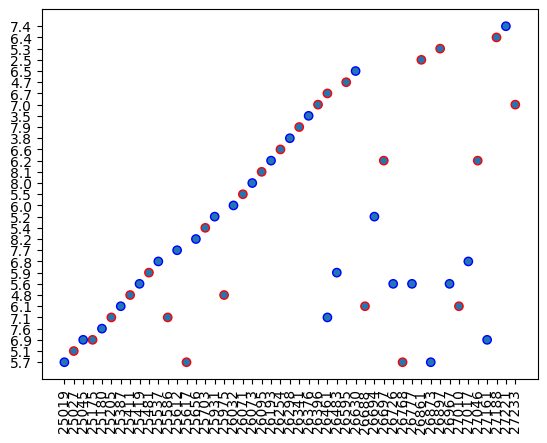

In [289]:
plt.scatter(df_votes_list.Votes, df_votes_list.Ratings, edgecolors=['blue', 'red'])
plt.xticks(rotation=90)
plt.show()
